# N-gram analysis of single document
An n-gram is a sequence of n consecutive words from a text document

We can use NLTK to perform n-gram analysis of our two datasets

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fitz
import nltk
from nltk.corpus import stopwords
import re
import unicodedata
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import seaborn as sns

NLTK requires three one-time downloads to access tokenizers and corpora

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/george/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/george/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/george/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will use the National Planning Policy Framework (Sept 2023) as our test data source


## Extraction and cleaning

In [5]:
def extractPDF(doc):
    """
    Opens the PDF document, tokenizes text and cleans using regex.
    """
    doc = fitz.open(doc)
    text = ""
    for page in doc:
        text = text + page.get_text()    
    
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [6]:
def ngram_clean(text):
  """
  Tokenizes text, cleans using regex, lemmatizes, removes stopwords, forces lower case - returning a list of words.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
text_nppf = extractPDF('NPPF_Sept_23.pdf')
tokens_nppf = ngram_clean(text_nppf)

## N-gram generation

We can now convert the list of tokens into a pandas series with the found n-grams

ngrams(tokens, n).value_counts, where tokens is the dataset, n is the number of sequential words and value_counts[] is the number of n-grams generated in the series

In [8]:
def ngram_gen(tokens, n, topn):
    tokens = (pd.Series(nltk.ngrams(tokens, n)).value_counts())[:topn]
    return tokens

## N-gram visualisation

### Setting global rcParams for graph customisation 

In [9]:
plt.rcParams['figure.facecolor'] = '#12273F' 
plt.rcParams['axes.facecolor'] = '#12273F'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.edgecolor']='#FFFFFF'
plt.rcParams['axes.labelcolor']='#FFFFFF'
plt.rcParams['text.color']='#FFFFFF'
plt.rcParams['xtick.color']='#FFFFFF'
plt.rcParams['ytick.color']='#FFFFFF'

### Visualisation

In [10]:
unigrams_nppf = ngram_gen(tokens_nppf, 1, 15)
bigrams_nppf = ngram_gen(tokens_nppf, 2, 15)
trigrams_nppf = ngram_gen(tokens_nppf, 3, 15)
quadgrams_nppf = ngram_gen(tokens_nppf, 4, 15)

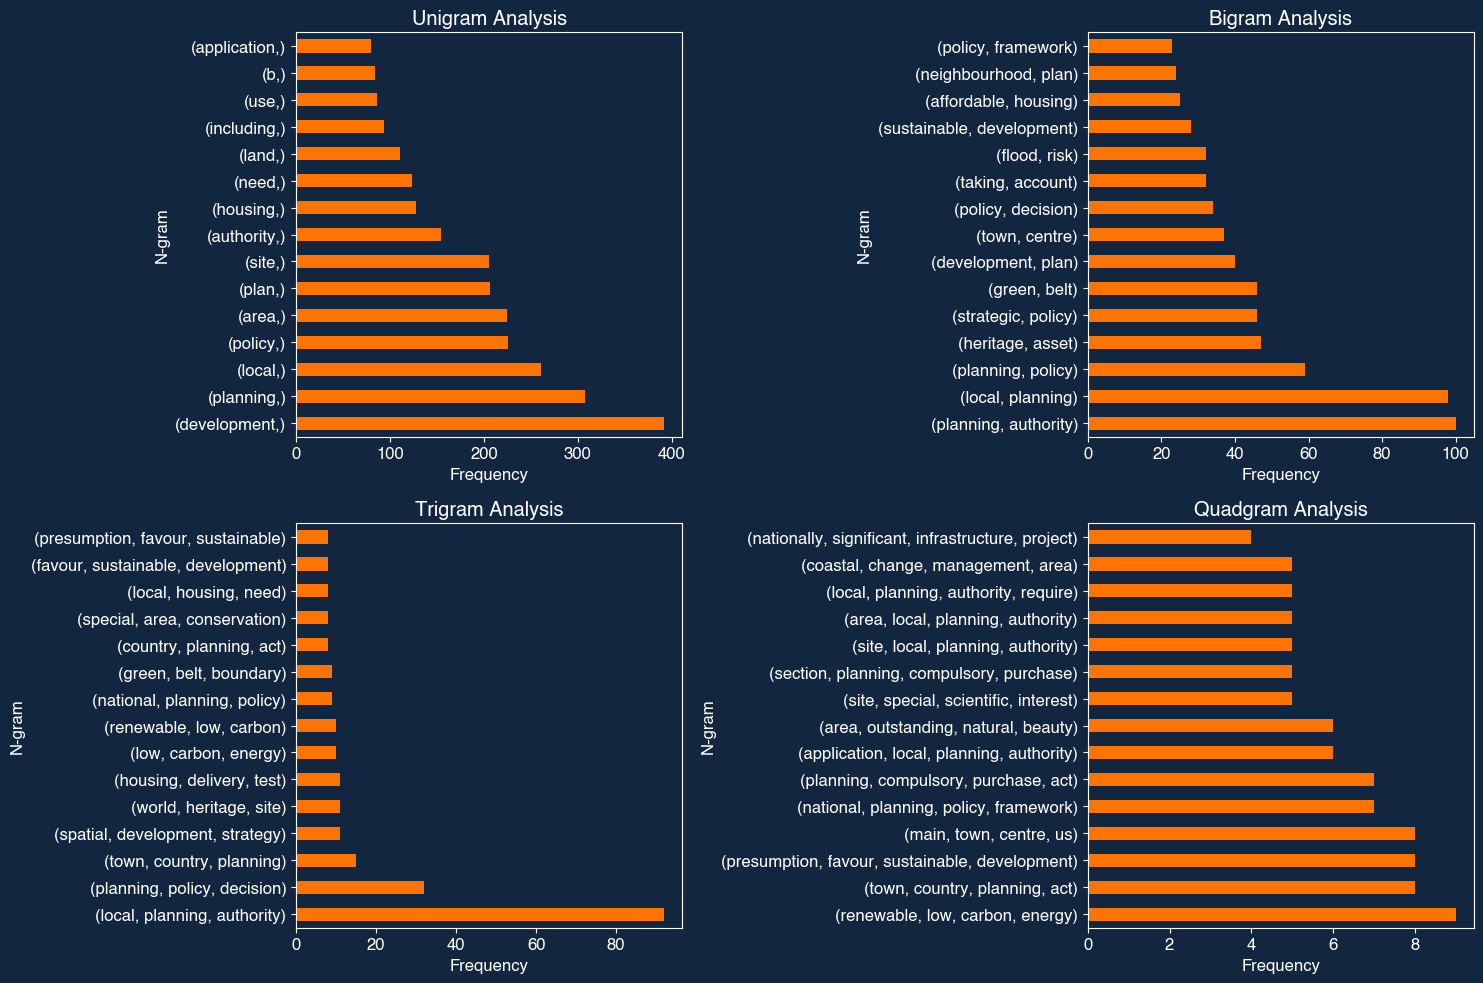

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Plot unigram counts
unigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[0, 0])
axs[0, 0].set_xlabel('Frequency')
axs[0, 0].set_ylabel('N-gram')
axs[0, 0].set_title('Unigram Analysis')

# Plot bigram counts
bigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[0, 1])
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('N-gram')
axs[0, 1].set_title('Bigram Analysis')

# Plot trigram counts
trigrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[1, 0])
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('N-gram')
axs[1, 0].set_title('Trigram Analysis')

# Plot quadgram counts
quadgrams_nppf.plot(kind='barh', color = '#FF7300', ax=axs[1, 1])
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('N-gram')
axs[1, 1].set_title('Quadgram Analysis')

plt.tight_layout()
plt.show()

# TF-IDF analysis 

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects how important a word is to a document within a collection of documents. It increases proportionally to the number of times a word appears in a document but is offset by the frequency of the word in the corpus.

- **Term Frequency (TF)**: How frequently a term appears in a document
- **Inverse Document Frequency (IDF)**: How rare or common a term is across all documents


We use both `CountVectorizer` (for term frequency) and `TfidfVectorizer` (for TF-IDF scores)

In [12]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

In [13]:
count_wm = countvectorizer.fit_transform([text_nppf])
tfidf_wm = tfidfvectorizer.fit_transform([text_nppf])

In [14]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

In [15]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['NPPF'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['NPPF'],columns = tfidf_tokens)
print(df_countvect)
print(df_tfidfvect)

      abandoned  ability  able  absence  acceptable  access  accessibility  \
NPPF          2        6     5        1          16      21              6   

      accessible  accidents  accommodate  ...  writing  written  \
NPPF          15          1            5  ...        1        4   

      wwwgovukdluhc  yards  year  years  za  zero  zone  zones  
NPPF              1      1    13     33   1     1     4      3  

[1 rows x 2568 columns]
      abandoned   ability      able   absence  acceptable    access  \
NPPF   0.002394  0.007182  0.005985  0.001197    0.019151  0.025135   

      accessibility  accessible  accidents  accommodate  ...   writing  \
NPPF       0.007182    0.017954   0.001197     0.005985  ...  0.001197   

       written  wwwgovukdluhc     yards     year     years        za  \
NPPF  0.004788       0.001197  0.001197  0.01556  0.039499  0.001197   

          zero      zone     zones  
NPPF  0.001197  0.004788  0.003591  

[1 rows x 2568 columns]


In [16]:
#filter by top 15 tfidf scores
df_tfidfvect_top15 = df_tfidfvect.T.nlargest(15, 'NPPF').T
print(df_tfidfvect_top15)

      development  planning     local  policies     sites   housing     areas  \
NPPF     0.442863  0.368653  0.312398  0.226219  0.168767  0.153207  0.143631   

          plan      land      area  authorities  including     plans  \
NPPF  0.142434  0.132859  0.125677     0.122086   0.112511  0.104133   

           use  strategic  
NPPF  0.102936   0.092163  


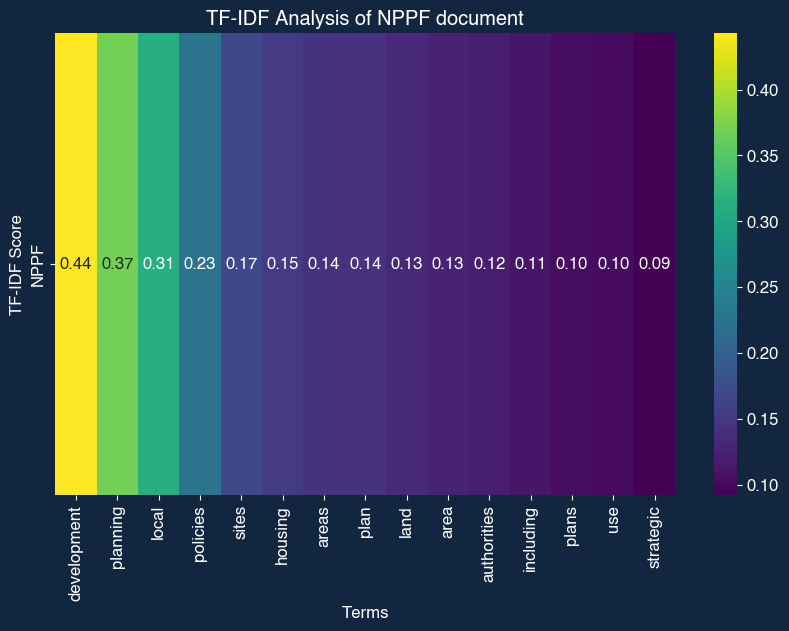

In [ ]:
# Plot TF-IDF heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_tfidfvect_top15, cmap='viridis', annot=True, fmt=".2f")
plt.title('TF-IDF Analysis of NPPF document')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.show()

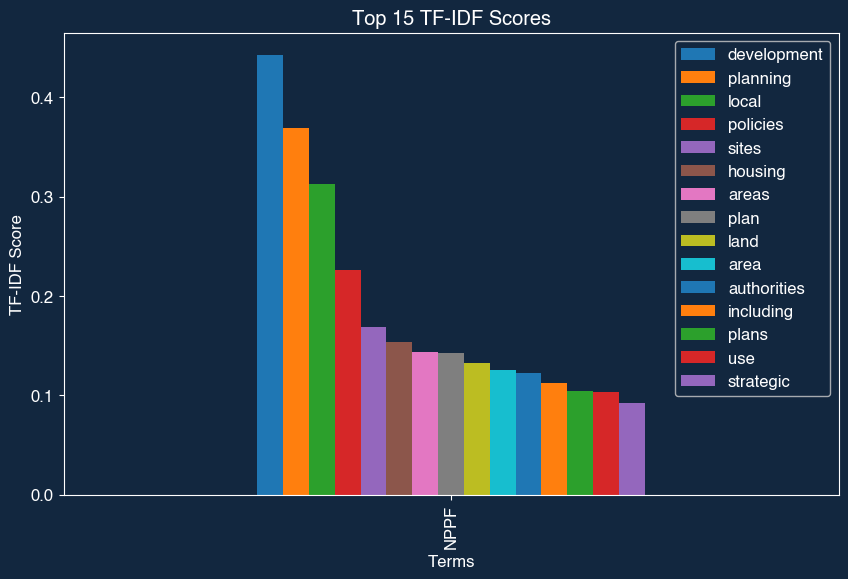

In [18]:
df_tfidfvect_top15 = df_tfidfvect_top15.sort_index()
df_tfidfvect_top15.plot(kind='bar', figsize=(10, 6))
plt.title('Top 15 TF-IDF Scores')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.show()

# Sentiment analysis

Sentiment analysis is a NLP technique that determines the emotional tone and subjective opinions expressed in text. We evaluate two key dimensions:

- Polarity: Measures the emotional orientation of the text on a scale from -1 (negative) to +1 (positive), with 0 being neutral
- Subjectivity: Measures how much of the text expresses personal opinions versus objective facts on a scale from 0 (objective) to 1 (subjective)

Overall NPPF Sentiment - Polarity: 0.124, Subjectivity: 0.391


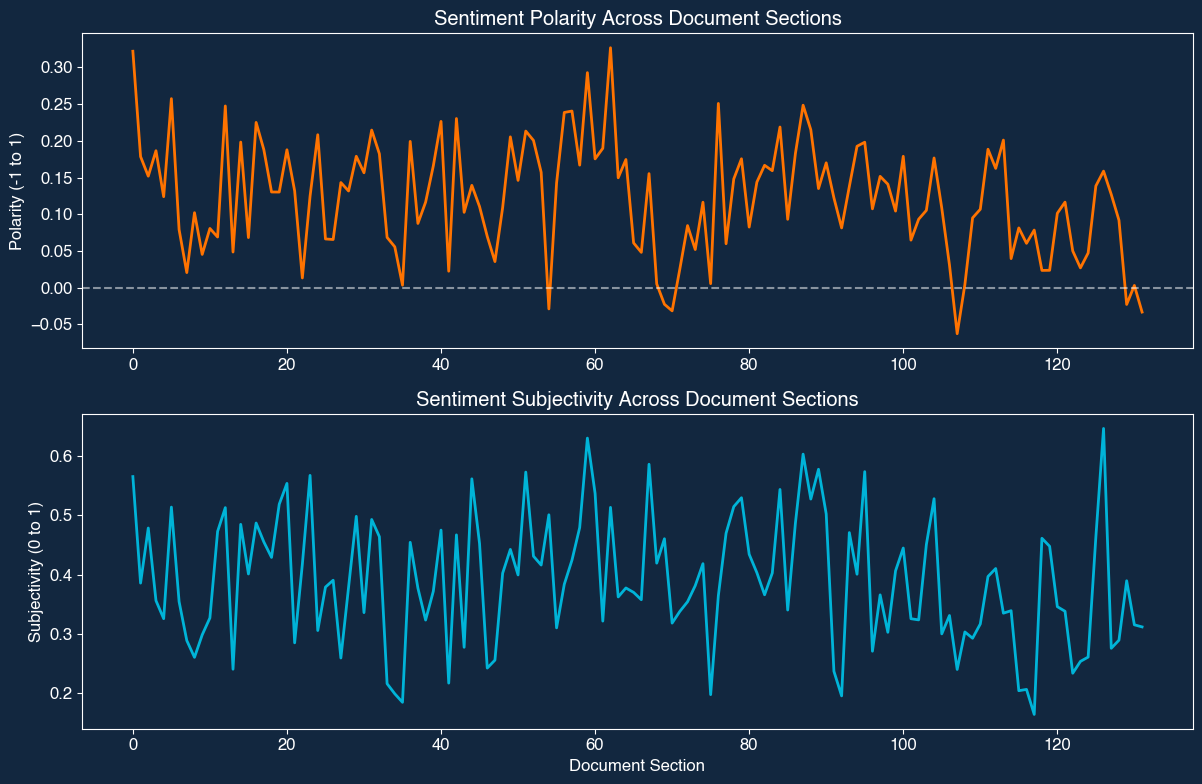

In [19]:
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

def analyze_sentiment(text):
    """
    Analyze sentiment of the document
    """
    blob = TextBlob(text)
    return {
        'polarity': blob.sentiment.polarity,
        'subjectivity': blob.sentiment.subjectivity
    }

def sentiment_by_sections(text, section_size=1000):
    """
    Analyze sentiment across different sections of the document
    """
    sections = [text[i:i+section_size] for i in range(0, len(text), section_size)]
    sentiments = []
    
    for i, section in enumerate(sections):
        sentiment = analyze_sentiment(section)
        sentiment['section'] = i
        sentiments.append(sentiment)
    
    return pd.DataFrame(sentiments)

# Analyze sentiment
nppf_sentiment = analyze_sentiment(text_nppf)
print(f"Overall NPPF Sentiment - Polarity: {nppf_sentiment['polarity']:.3f}, Subjectivity: {nppf_sentiment['subjectivity']:.3f}")

# Sentiment across sections
sentiment_df = sentiment_by_sections(text_nppf)

# Visualize sentiment trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(sentiment_df['section'], sentiment_df['polarity'], color='#FF7300', linewidth=2)
ax1.set_title('Sentiment Polarity Across Document Sections')
ax1.set_ylabel('Polarity (-1 to 1)')
ax1.axhline(y=0, color='white', linestyle='--', alpha=0.5)

ax2.plot(sentiment_df['section'], sentiment_df['subjectivity'], color='#00B4D8', linewidth=2)
ax2.set_title('Sentiment Subjectivity Across Document Sections')
ax2.set_xlabel('Document Section')
ax2.set_ylabel('Subjectivity (0 to 1)')

plt.tight_layout()
plt.show()

# LDA

Latent Dirichlet Allocation (LDA) is an unsupervised machine learning technique that discovers topics within a document. 
It assumes that:
- Each document contains a mixture of topics
- Each topic is characterised by a distribution of words

LDA does the following:
1. Divides documents into chunks for analysis
2. Creates a document-term matrix showing word frequencies
3. Identifies latent topics based on word co-occurrence patterns
4. Assigns probability distributions for words within each topic

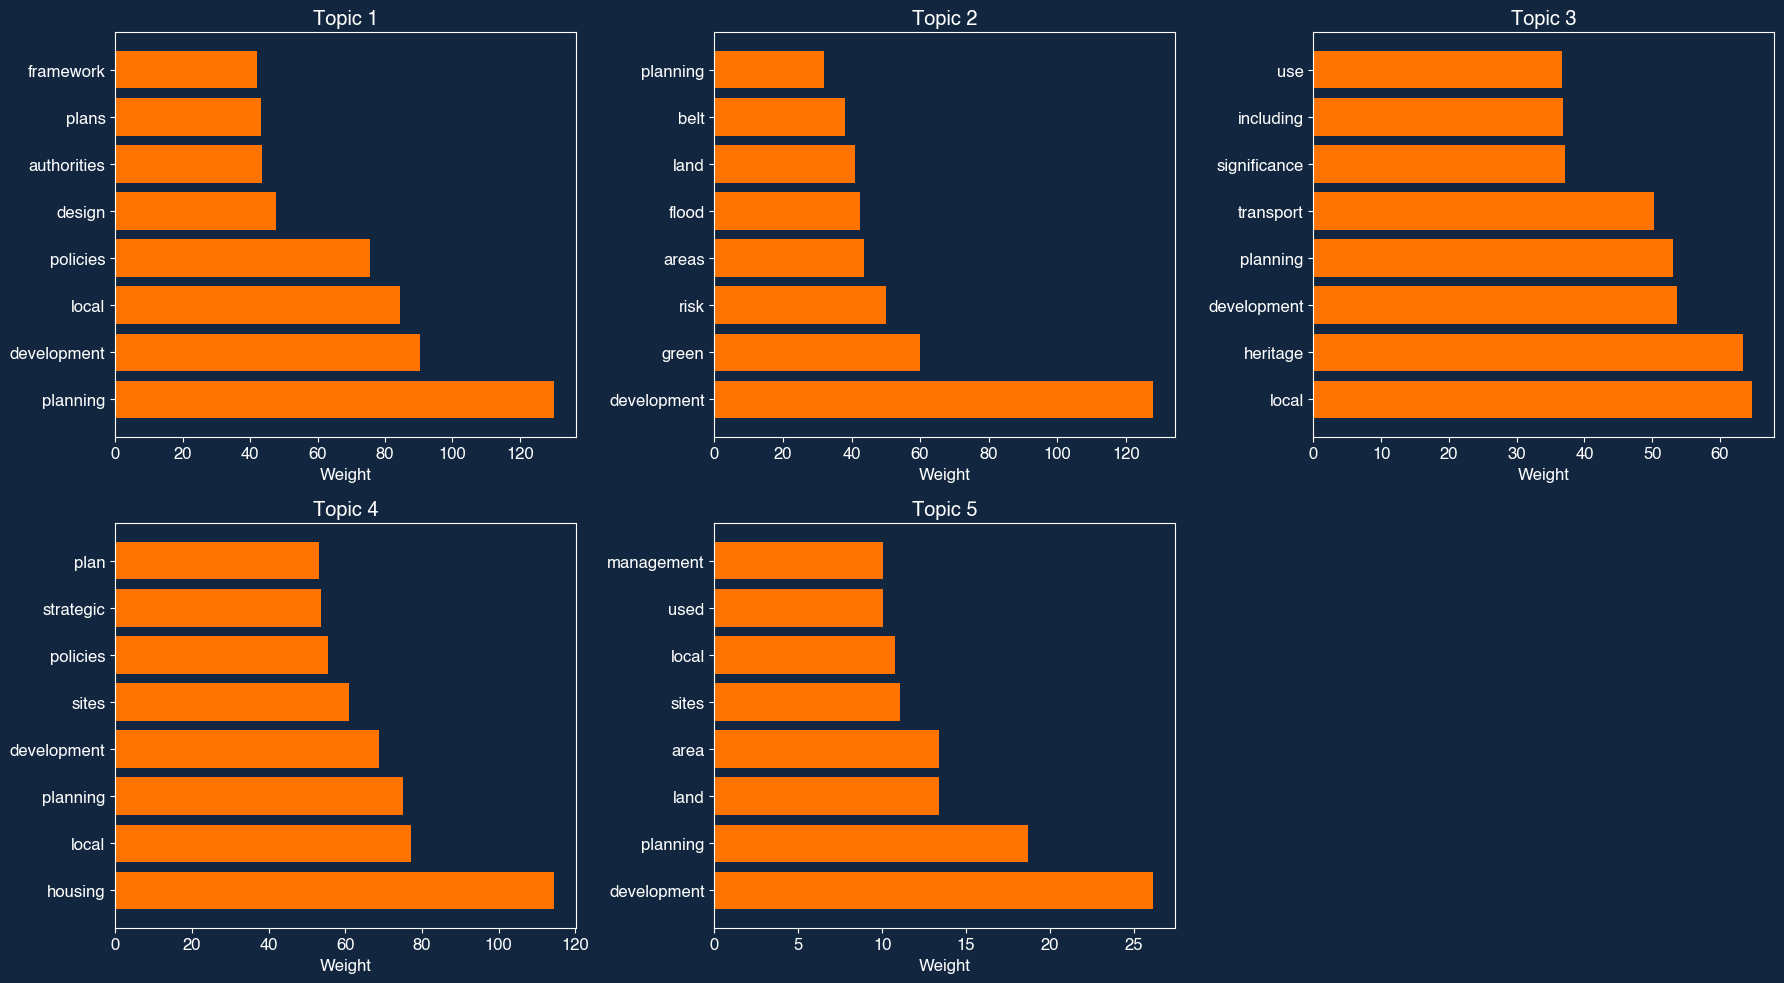

In [ ]:

def perform_topic_modeling(text, n_topics=5, n_words=10):
    """
    Perform LDA topic modeling on the document
    """
    # Split text into chunks for topic analysis
    chunk_size = 2000
    chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
    
    # Vectorise 
    vectorizer = CountVectorizer(max_features=100, stop_words='english', min_df=2)
    doc_term_matrix = vectorizer.fit_transform(chunks)
    
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)
    
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append({
            'topic': topic_idx,
            'words': top_words,
            'weights': topic[top_words_idx]
        })
    
    return topics, lda, vectorizer, doc_term_matrix

topics, lda_model, vectorizer, doc_matrix = perform_topic_modeling(text_nppf)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, topic in enumerate(topics):
    if i < len(axes):
        ax = axes[i]
        words = topic['words'][:8]  # Top 8 words
        weights = topic['weights'][:8]
        
        bars = ax.barh(range(len(words)), weights, color='#FF7300')
        ax.set_yticks(range(len(words)))
        ax.set_yticklabels(words)
        ax.set_title(f'Topic {i+1}')
        ax.set_xlabel('Weight')

# Hide unused subplots
for i in range(len(topics), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()